In [43]:
import os
import re
import cv2 
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage.io import imread_collection

In [44]:
path = r"C:\Users\ASUS\Downloads\tracking-data\tracking-data"
dirs = os.listdir(path)

In [45]:
#col_frames = os.listdir(path+'tracking-data')
images = []
#col_frames.sort(key = lambda f: int(re.sub('\D', '', f)))
#for i in col_frames:
    #images = cv2.imread('path/' +i)
    #col_images.append(images)
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    if img is not None:
        images.append(img)    

 

In [46]:
images

[array([[[  3,   1,   1],
         [  3,   1,   1],
         [  3,   1,   1],
         ...,
         [  3,   0,  10],
         [  3,   0,  10],
         [  3,   0,  10]],
 
        [[  4,   2,   2],
         [  4,   2,   2],
         [  4,   2,   2],
         ...,
         [  0,   0,   9],
         [  2,   0,   9],
         [  0,   0,   9]],
 
        [[  6,   3,   5],
         [  6,   3,   5],
         [  6,   3,   5],
         ...,
         [  0,   0,  10],
         [  1,   0,  10],
         [  0,   0,  10]],
 
        ...,
 
        [[103,  99, 104],
         [103,  99, 104],
         [103,  99, 104],
         ...,
         [150, 162, 180],
         [150, 162, 180],
         [150, 162, 180]],
 
        [[103,  99, 104],
         [103,  99, 104],
         [103,  99, 104],
         ...,
         [149, 161, 179],
         [149, 161, 179],
         [149, 161, 179]],
 
        [[103,  99, 104],
         [103,  99, 104],
         [103,  99, 104],
         ...,
         [148, 160, 178],
  

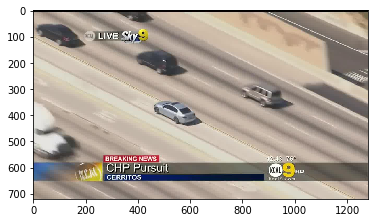

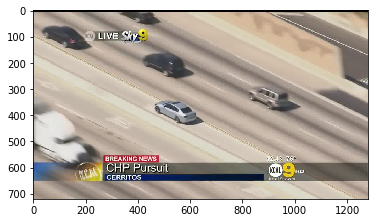

In [47]:
i = 13

for path in [i, i+1]:
    plt.imshow(cv2.cvtColor(images[path], cv2.COLOR_BGR2RGB))
    #plt.title("frame: "+str(frame))
    plt.show()

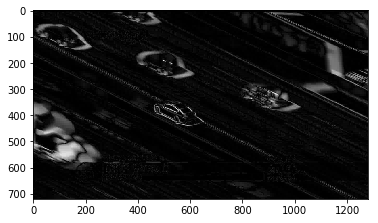

In [48]:
grayA = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(images[i+1], cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')

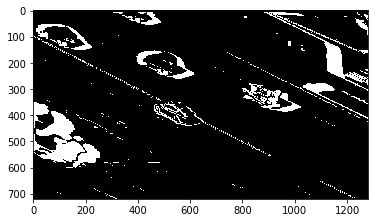

In [49]:
diff_image = cv2.absdiff(grayB, grayA)

ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap = 'gray')
plt.show()

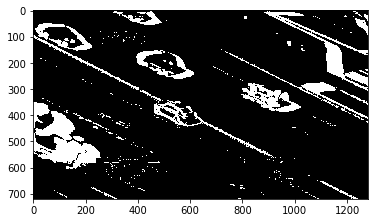

In [50]:

kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)


plt.imshow(dilated, cmap = 'gray')
plt.show()

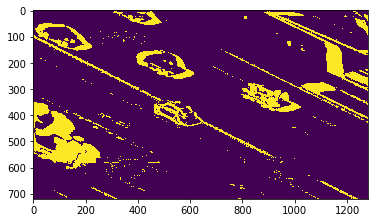

In [51]:
plt.imshow(dilated)
cv2.line(dilated, (0,80), (256,80), (100,0,0))
plt.show()

In [52]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


In [53]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

len(valid_cntrs)

16

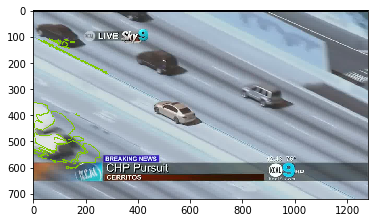

In [54]:
dmy = images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [55]:

kernel = np.ones((4,4),np.uint8)

font = cv2.FONT_HERSHEY_SIMPLEX


pathIn = r"C:\Users\ASUS\Downloads\Video"

for i in range(len(col_images)-1):
    grayA = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
 
    dilated = cv2.dilate(thresh,kernel,iterations = 1)

    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
   
    dmy = images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [61]:
pathout = 'vehicle_detection_v3.mp4'
fps = 14.0

In [62]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [93]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))


for i in range(len(files)):
    filename=pathIn + files[i]
    img = cv2.imread(filename)
    (h,w,d) = img.shape
    size = (w,h)
    print(size)
    frame_array.append(img)

In [98]:
print(img.shape)
print(h)


(720, 1280, 3)
3


In [99]:
out = cv2.VideoWriter(pathout,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    out.write(frame_array[i])

out.release()

TypeError: integer argument expected, got float